In [1]:
# Importing necessary modules
import collections
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
data_path = 'data/'

In [3]:
# Load the data files
aisles_df = pd.read_csv(data_path + 'aisles.csv')
departments_df = pd.read_csv(data_path + 'departments.csv')
products_df = pd.read_csv(data_path + 'products.csv')
orders_df = pd.read_csv(data_path + 'orders.csv')
order_prior_df = pd.read_csv(data_path + 'order_products__prior.csv')
order_train_df = pd.read_csv(data_path + 'order_products__train.csv')


In [4]:
print(f'## df: \n {aisles_df.head()}')
print(f'## Shape: {aisles_df.shape} & Columns : \n{aisles_df.columns}')

## df: 
    aisle_id                       aisle
0         1       prepared soups salads
1         2           specialty cheeses
2         3         energy granola bars
3         4               instant foods
4         5  marinades meat preparation
## Shape: (134, 2) & Columns : 
Index(['aisle_id', 'aisle'], dtype='object')


In [5]:
print(f'## df: \n {departments_df.head()}')
print(f'## Shape: {departments_df.shape} & Columns : \n{departments_df.columns}')

## df: 
    department_id department
0              1     frozen
1              2      other
2              3     bakery
3              4    produce
4              5    alcohol
## Shape: (21, 2) & Columns : 
Index(['department_id', 'department'], dtype='object')


In [6]:
print(f'## df: \n {products_df.head()}')
print(f'## Shape: {products_df.shape} & Columns : \n{products_df.columns}')

## df: 
    product_id                                       product_name  aisle_id  \
0           1                         Chocolate Sandwich Cookies        61   
1           2                                   All-Seasons Salt       104   
2           3               Robust Golden Unsweetened Oolong Tea        94   
3           4  Smart Ones Classic Favorites Mini Rigatoni Wit...        38   
4           5                          Green Chile Anytime Sauce         5   

   department_id  
0             19  
1             13  
2              7  
3              1  
4             13  
## Shape: (49688, 4) & Columns : 
Index(['product_id', 'product_name', 'aisle_id', 'department_id'], dtype='object')


In [7]:
print(f'## df: \n {orders_df.head()}')
print(f'## Shape: {orders_df.shape} & Columns : \n{orders_df.columns}')

## df: 
    order_id  user_id eval_set  order_number  order_dow  order_hour_of_day  \
0   2539329        1    prior             1          2                  8   
1   2398795        1    prior             2          3                  7   
2    473747        1    prior             3          3                 12   
3   2254736        1    prior             4          4                  7   
4    431534        1    prior             5          4                 15   

   days_since_prior_order  
0                     NaN  
1                    15.0  
2                    21.0  
3                    29.0  
4                    28.0  
## Shape: (3421083, 7) & Columns : 
Index(['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order'],
      dtype='object')


In [8]:
print(f'## df: \n {order_prior_df.head()}')
print(f'## Shape: {order_prior_df.shape} & Columns : \n{order_prior_df.columns}')

## df: 
    order_id  product_id  add_to_cart_order  reordered
0         2       33120                  1          1
1         2       28985                  2          1
2         2        9327                  3          0
3         2       45918                  4          1
4         2       30035                  5          0
## Shape: (32434489, 4) & Columns : 
Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered'], dtype='object')


In [9]:
print(f'## df: \n {order_train_df.head()}')
print(f'## Shape: {order_train_df.shape} & Columns : \n{order_train_df.columns}')

## df: 
    order_id  product_id  add_to_cart_order  reordered
0         1       49302                  1          1
1         1       11109                  2          1
2         1       10246                  3          0
3         1       49683                  4          0
4         1       43633                  5          1
## Shape: (1384617, 4) & Columns : 
Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered'], dtype='object')


In [10]:
# Fetch order and user distribution in prior, train and test eval_sets
# num_orders = orders_df.eval_set.value_counts().rename_axis('eval_set').reset_index(name='counts')
# print(num_orders)

num_customers = orders_df.groupby('eval_set')['order_id', 'user_id'].nunique()
print(num_customers)

          order_id  user_id
eval_set                   
prior      3214874   206209
test         75000    75000
train       131209   131209


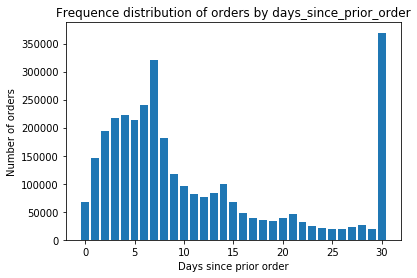

In [11]:
# Frequency distribution of orders placed based on 'days_since_prior_order'

unique_order_intervals = orders_df.days_since_prior_order.dropna().unique()
unique_order_intervals.sort()

num_orders = orders_df.groupby('days_since_prior_order')['order_id'].count()

plt.bar(unique_order_intervals, num_orders)
plt.xlabel('Days since prior order')
plt.ylabel('Number of orders')
plt.title('Frequence distribution of orders by days_since_prior_order')
plt.show()

We see that most orders are placed in weekly and monthly intervals

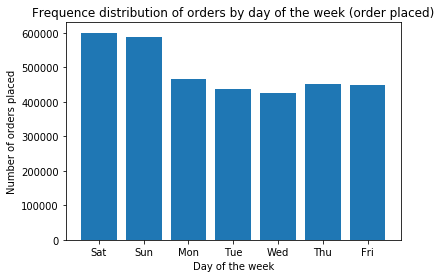

In [12]:
# Distribution of orders based on the day of week(dow) ordered

ordered_day = orders_df.order_dow.dropna().unique()
ordered_day.sort()

num_orders = orders_df.groupby('order_dow')['order_id'].count()
x_labels = ['Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri']

plt.bar(ordered_day, num_orders, tick_label=x_labels)
plt.xlabel('Day of the week')
plt.ylabel('Number of orders placed')
plt.title('Frequence distribution of orders by day of the week (order placed)')
plt.show()

We see most orders been placed on weekends as compared to weekdays

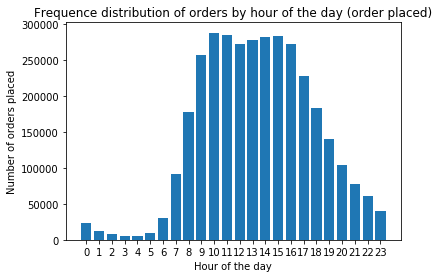

In [13]:
# Distribution of orders based on the hour of day (hod) ordered

ordered_hour = orders_df.order_hour_of_day.dropna().unique()
ordered_hour.sort()

num_orders = orders_df.groupby('order_hour_of_day')['order_id'].count()

plt.bar(ordered_hour, num_orders, tick_label=ordered_hour)
plt.xlabel('Hour of the day')
plt.ylabel('Number of orders placed')
plt.title('Frequence distribution of orders by hour of the day (order placed)')
plt.show()

Most orders are placed in the prime day time

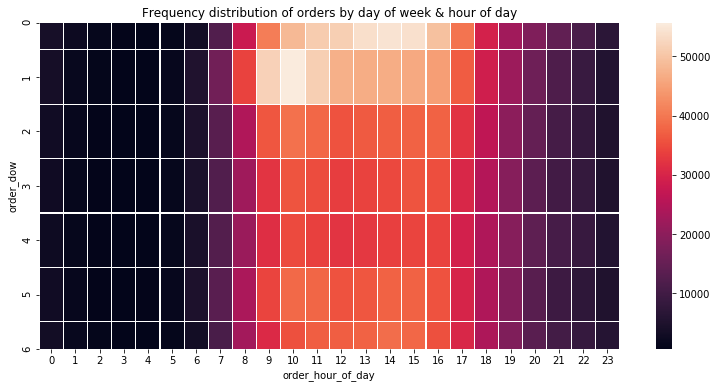

In [14]:
# Distribution of orders based on day + hour

num_orders = orders_df.groupby(["order_dow", "order_hour_of_day"])["order_id"].count().reset_index()
num_orders = num_orders.pivot('order_dow', 'order_hour_of_day', 'order_id')
num_orders

plt.figure(figsize=(13,6))
plt.title('Frequency distribution of orders by day of week & hour of day')
sns.heatmap(num_orders, linewidth=0.1)
plt.show()

Find a lot of orders placed on saturdays afternoons and sunday mornings

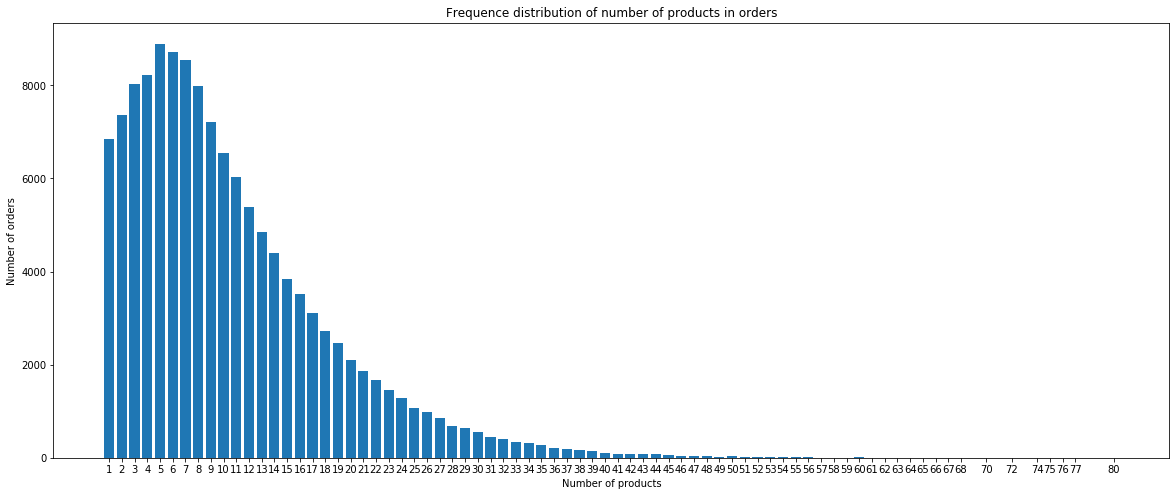

Statistics of product distribution across orders
Mean :  10.552759338155157
Median :  9.0
Mode :  ModeResult(mode=array([5]), count=array([8895]))
Std Deviation :  7.93281653515777


In [15]:
# Average products bought in each order in train set
num_products = order_train_df.groupby('order_id')['add_to_cart_order'].max()
num_products = list(num_products)
num_products.sort()

counter = collections.Counter(num_products)
y_vals = list(counter.values())
x_vals = list(counter.keys())

plt.figure(figsize=(20,8))
plt.bar(x_vals, y_vals, tick_label=x_vals)
plt.xlabel('Number of products')
plt.ylabel('Number of orders')
plt.title('Frequence distribution of number of products in orders')
plt.show()

print("Statistics of product distribution across orders")
print("Mean : ", np.mean(num_products))
print("Median : ", np.median(num_products))
print("Mode : ", stats.mode(num_products))
print("Std Deviation : ", np.std(num_products))

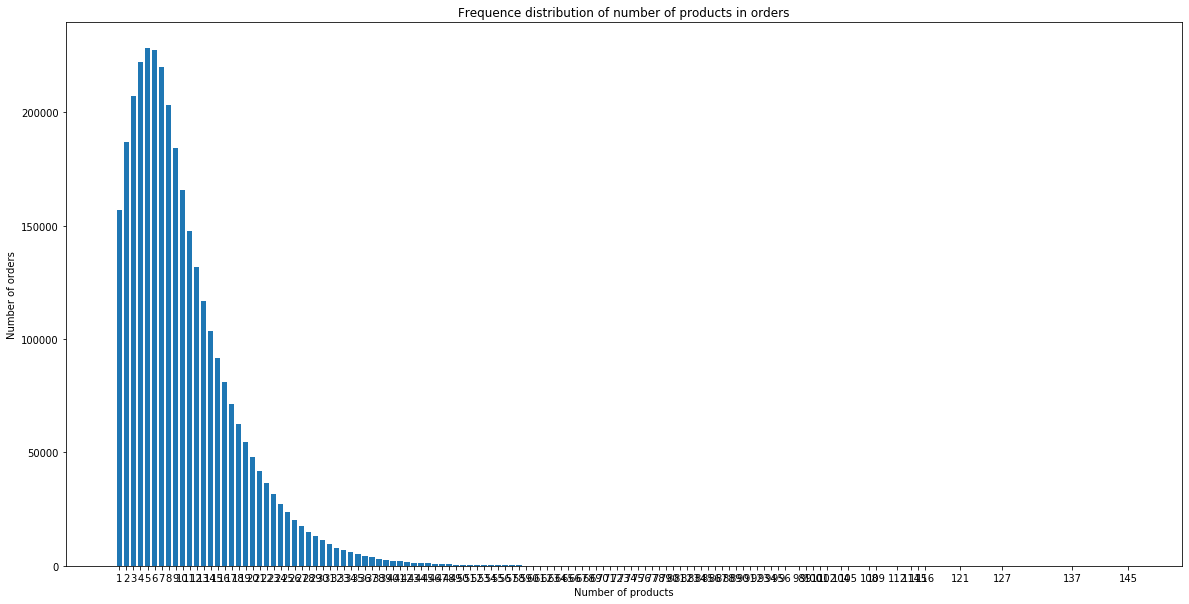

Statistics of product distribution across orders
Mean :  10.088883421247614
Median :  8.0
Mode :  ModeResult(mode=array([5]), count=array([228330]))
Std Deviation :  7.525397169642686


In [16]:
# Average products bought in each order in prior set
num_products = order_prior_df.groupby('order_id')['add_to_cart_order'].max()
num_products = list(num_products)
num_products.sort()

counter = collections.Counter(num_products)
y_vals = list(counter.values())
x_vals = list(counter.keys())

plt.figure(figsize=(20,10))
plt.bar(x_vals, y_vals, tick_label=x_vals)
plt.xlabel('Number of products')
plt.ylabel('Number of orders')
plt.title('Frequence distribution of number of products in orders')
plt.show()

print("Statistics of product distribution across orders")
print("Mean : ", np.mean(num_products))
print("Median : ", np.median(num_products))
print("Mode : ", stats.mode(num_products))
print("Std Deviation : ", np.std(num_products))

We find an order with 145 products (prior set) and 80 products (train set). Let's check how frequent these orders were (i.e. post how many days the order was placed)

In [17]:
# Find order with max items ordered (train set)
num_products = order_train_df.groupby('order_id')['add_to_cart_order'].max()
max_order = num_products[num_products == 80].reset_index()
max_order = max_order['order_id'][0]

# Find 'days_since_prior_order' and 'reordered' items for the max order
num_reordered = order_train_df[order_train_df['order_id'] == max_order]['reordered'].sum()
days_since_prior_order = orders_df[orders_df['order_id'] == max_order]['days_since_prior_order']

max_order_metadata = pd.DataFrame({'order_id': max_order,
                                   'Num of products in order': 80,
                                   'Items Reordered': num_reordered,
                                   'days_since_prior_order': int(days_since_prior_order)
                                   }, index=['max_order_metadata'])
max_order_metadata

,order_id,Num of products in order,Items Reordered,days_since_prior_order
max_order_metadata,1395075,80,48,30


In [18]:
# Find order with max items ordered
num_products = order_prior_df.groupby('order_id')['add_to_cart_order'].max()
max_order = num_products[num_products == 145].reset_index()
max_order = max_order['order_id'][0]

# Find 'days_since_prior_order' and 'reordered' items for the max order
num_reordered = order_prior_df[order_prior_df['order_id'] == max_order]['reordered'].sum()
days_since_prior_order = orders_df[orders_df['order_id'] == max_order]['days_since_prior_order']

max_order_metadata = pd.DataFrame({'order_id': max_order,
                                   'Num of products in order': 145,
                                   'Items Reordered': num_reordered,
                                   'days_since_prior_order': int(days_since_prior_order)
                                   }, index=['max_order_metadata'])
max_order_metadata

,order_id,Num of products in order,Items Reordered,days_since_prior_order
max_order_metadata,1564244,145,80,30


This provides a hint of a correlation between number of products per order v/s days_since_prior_order. This pattern needs to be investigated. If this correlation exists, it would help us with number of products we should provide as predictions. 

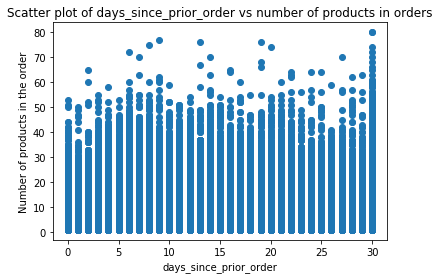

In [19]:
# Examining Relationship between days_since_prior_order vs 
# number of products in the order 

num_products = order_train_df.groupby('order_id')['add_to_cart_order'].max()
num_products = num_products.reset_index()

merged_df = pd.merge(num_products,
                     orders_df[['order_id', 'days_since_prior_order']], 
                     how='left', 
                     on='order_id')

plt.scatter(merged_df['days_since_prior_order'], merged_df['add_to_cart_order'])
plt.xlabel('days_since_prior_order')
plt.ylabel('Number of products in the order')
plt.title('Scatter plot of days_since_prior_order vs number of products in orders')
plt.show()

Apparently there exists no coorelation between these variables. However, let us calculate the percentage of products that are reordered in orders (prior & train set)

In [20]:
# Percentage of reordered products in prior & train

reordered = order_prior_df['reordered'].sum()
total = len(order_prior_df)
prior_reorder_percent = reordered / total

reordered = order_train_df['reordered'].sum()
total = len(order_train_df)
train_reorder_percent = reordered / total

print(f"% products reordered in prior set : {prior_reorder_percent}")
print(f"% products reordered in train set : {train_reorder_percent}")

% products reordered in prior set : 0.5896974667922161
% products reordered in train set : 0.5985944127509629


In [21]:
# Mean reordered products per order in prior & train
reordered = order_prior_df.groupby('order_id')['reordered'].mean().reset_index()
non_reorders = reordered[reordered['reordered'] == 0.0]
num_non_reorders = len(non_reorders)
total_prior_orders = order_prior_df['order_id'].nunique()
num_reorders = total_prior_orders - num_non_reorders
print(f'\nOrders having no reordered items (prior set) : {num_non_reorders} / {total_prior_orders} ({(num_non_reorders/total_prior_orders) * 100:.3f}%)')

avg_reordered = reordered['reordered'].sum() / num_reorders * 100
print(f"Average products reordered per order (amongst orders having reordered items in prior set): {avg_reordered:.3f}%")

reordered = order_train_df.groupby('order_id')['reordered'].mean().reset_index()
non_reorders = reordered[reordered['reordered'] == 0.0]
num_non_reorders = len(non_reorders)
total_train_orders = order_train_df['order_id'].nunique()
num_reorders = total_train_orders - num_non_reorders
print(f'\nOrders having no reordered items (test set) : {num_non_reorders} / {total_train_orders} ({(num_non_reorders/total_train_orders) * 100:.3f}%)')

avg_reordered = reordered['reordered'].sum() / num_reorders * 100
print(f"Average products reordered per order (amongst orders having reordered items in test set): {avg_reordered:.3f}%")



Orders having no reordered items (prior set) : 388513 / 3214874 (12.085%)
Average products reordered per order (amongst orders having reordered items in prior set): 68.096%

Orders having no reordered items (test set) : 8602 / 131209 (6.556%)
Average products reordered per order (amongst orders having reordered items in test set): 64.474%


#Observations:
- 12% of the orders in the prior set have no reordered items in them
-  6.5% of the orders in the train set have no reordered items in them
-3) Out of the orders that contained reordered items,
    approximately 65% of the items in the users basket are reordered items (previously ordered).

Top 20 items bought: 
                 product_name  frequency
0                     Banana     472565
1     Bag of Organic Bananas     379450
2       Organic Strawberries     264683
3       Organic Baby Spinach     241921
4       Organic Hass Avocado     213584
5            Organic Avocado     176815
6                Large Lemon     152657
7               Strawberries     142951
8                      Limes     140627
9         Organic Whole Milk     137905
10       Organic Raspberries     137057
11      Organic Yellow Onion     113426
12            Organic Garlic     109778
13          Organic Zucchini     104823
14       Organic Blueberries     100060
15            Cucumber Kirby      97315
16        Organic Fuji Apple      89632
17             Organic Lemon      87746
18  Apple Honeycrisp Organic      85020
19    Organic Grape Tomatoes      84255


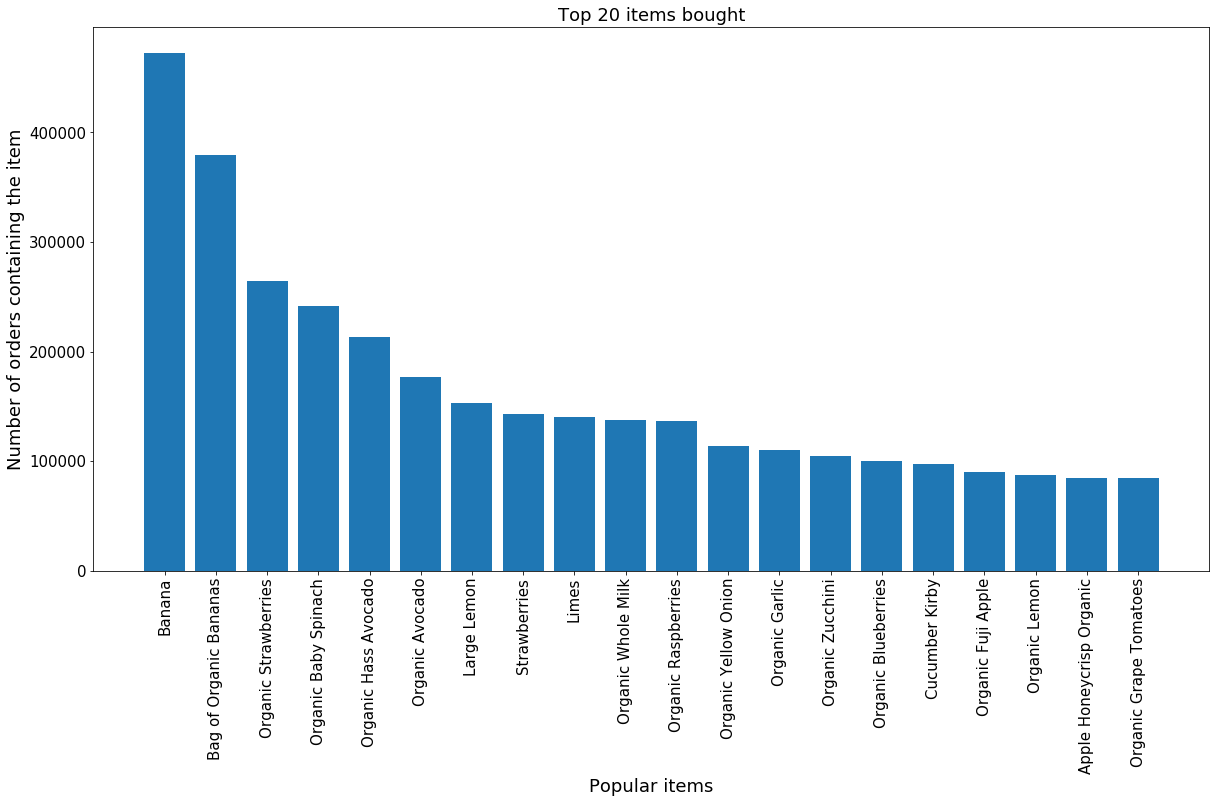

,aisle,frequency
0,fresh fruits,11
1,fresh vegetables,4
2,packaged vegetables fruits,4
3,milk,1


In [22]:
# The most bought item - prior set
order_prod_prior_df = pd.merge(order_prior_df[['order_id', 'product_id', 'reordered']],
                               products_df,
                               how='left', 
                               on='product_id')

item_frequency = order_prod_prior_df['product_name'].value_counts().reset_index()
item_frequency = item_frequency.rename(columns={'index': 'product_name',
                                                'product_name': 'frequency'})
top_20_freq_items = item_frequency[:20]
print("Top 20 items bought: \n", top_20_freq_items)

plt.figure(figsize=(20,10))
plt.bar(top_20_freq_items['product_name'],
        top_20_freq_items['frequency'],
        tick_label=top_20_freq_items['product_name'])
plt.xlabel('Popular items', fontsize=18)
plt.ylabel('Number of orders containing the item', fontsize=18)
plt.xticks(fontsize=15, rotation='vertical')
plt.yticks(fontsize=15)
plt.title('Top 20 items bought', fontsize=18)
plt.show()


# Aisles of the top 20 items
top_20_aisle_info = pd.merge(top_20_freq_items, 
                             pd.merge(products_df, aisles_df,
                                      how='left', on='aisle_id'),
                             how='left', 
                             on='product_name')
top_20_aisle_info['aisle'].value_counts().reset_index().rename(columns={'index': 'aisle',
                                                                        'aisle': 'frequency'})


The most frequently bought items seem to be organic products (fruits/vegetables) bought from the fresh/packed fruits, vegetables section

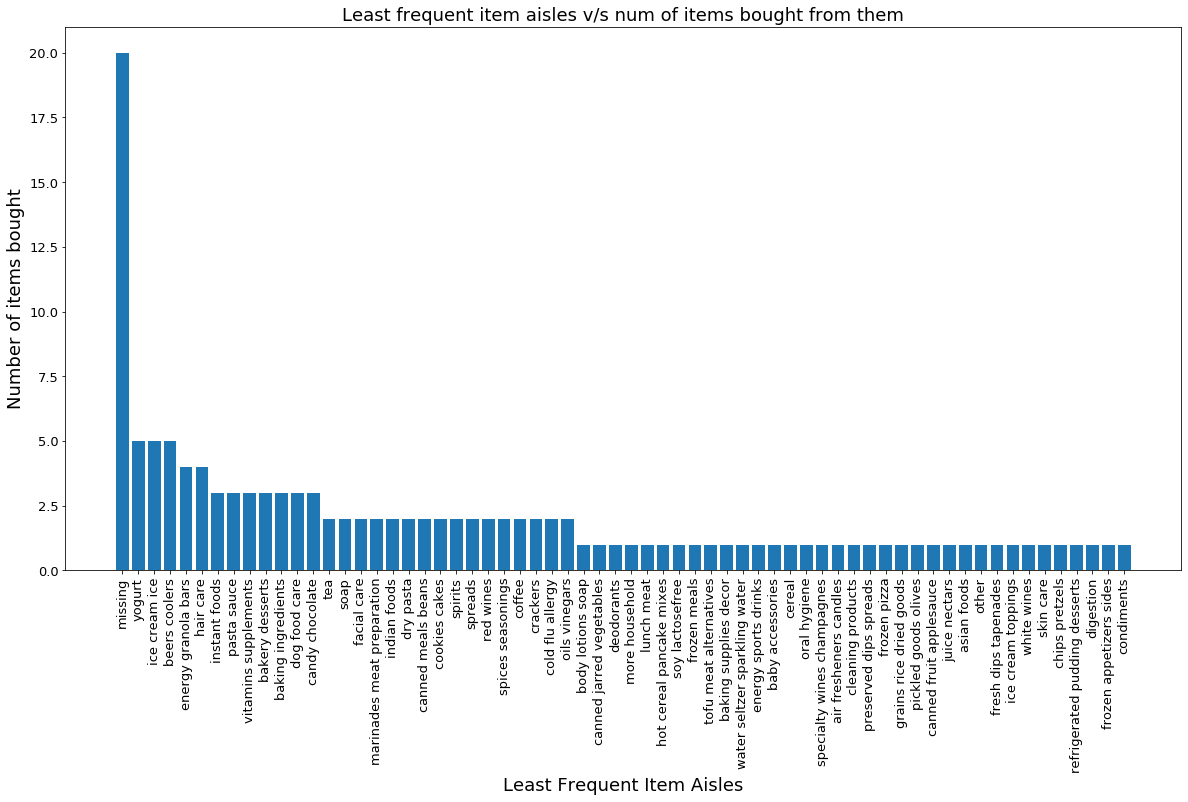

In [23]:
# Least frequent items
least_freq_items = item_frequency[item_frequency['frequency'] == 1]
# least_freq_items = least_freq_items.to_dict(orient='list')['product_name']
# print("Least frequent items: \n", least_freq_items)

least_freq_aisle_info = pd.merge(least_freq_items, 
                                 pd.merge(products_df, aisles_df,
                                          how='left', on='aisle_id'),
                                 how='left', 
                                 on='product_name')
uncommon_aisles = least_freq_aisle_info['aisle'].value_counts().reset_index().rename(columns={'index': 'aisle',
                                                                                              'aisle': 'frequency'})

plt.figure(figsize=(20,10))
plt.bar(uncommon_aisles['aisle'],
        uncommon_aisles['frequency'],
        tick_label=uncommon_aisles['aisle'])
plt.xlabel('Least Frequent Item Aisles', fontsize=18)
plt.ylabel('Number of items bought', fontsize=18)
plt.xticks(fontsize=13, rotation='vertical')
plt.yticks(fontsize=13)
plt.title('Least frequent item aisles v/s num of items bought from them', fontsize=18)
plt.show()

In [24]:
# Most pupolar items i.e highest reordered
# order_prod_prior_df = pd.merge(order_prior_df[['order_id', 'product_id', 'reordered']],
#                                products_df,
#                                how='left', 
#                                on='product_id')

reorder_frequency = order_prod_prior_df.groupby('product_name')['reordered'].sum().reset_index()
reorder_frequency = reorder_frequency.sort_values('reordered', ascending=False)

top_20_reordered = reorder_frequency[:20]

print(pd.DataFrame({'Top 20 frequent': np.array(top_20_freq_items['product_name']),
                    'Top 20 reordered': np.array(top_20_reordered['product_name'])
                   })
     )

             Top 20 frequent          Top 20 reordered
0                     Banana                    Banana
1     Bag of Organic Bananas    Bag of Organic Bananas
2       Organic Strawberries      Organic Strawberries
3       Organic Baby Spinach      Organic Baby Spinach
4       Organic Hass Avocado      Organic Hass Avocado
5            Organic Avocado           Organic Avocado
6                Large Lemon        Organic Whole Milk
7               Strawberries               Large Lemon
8                      Limes       Organic Raspberries
9         Organic Whole Milk              Strawberries
10       Organic Raspberries                     Limes
11      Organic Yellow Onion      Organic Yellow Onion
12            Organic Garlic            Organic Garlic
13          Organic Zucchini          Organic Zucchini
14       Organic Blueberries            Cucumber Kirby
15            Cucumber Kirby        Organic Fuji Apple
16        Organic Fuji Apple       Organic Blueberries
17        

We see that the top 20 reordered items are almost same (with only 1 item being different) as the top 20 frequent items.

In [25]:
# Unpopular items i.e. never reordered
never_reordered = reorder_frequency[reorder_frequency['reordered'] == 0]
never_reordered, len(never_reordered)

(                                            product_name  reordered
 15311            Foaming Herbal Hand Soap Lemon Rosemary          0
 49299                               Yellow Fish Breading          0
 20105      Homestyle Southwest Style White Chicken Chili          0
 19766  Herbal Tea, Acai Mango Zinger, Caffeine Free, ...          0
 20108  Homestyle Thick & Hearty Flavored with Meat Pa...          0
 ...                                                  ...        ...
 12364                        Decorating Green Cake Icing          0
 22796                               Lemon Ice Tea Liquid          0
 12363                                Decorating Gel, Red          0
 12362                               Decorating Gel White          0
 9481                                   Cld/Flu Van Chrry          0
 
 [4372 rows x 2 columns], 4372)

In [26]:
# Items that have been ordered multiple times but never reordered by any user
product_group = order_prod_prior_df.groupby('product_name')

ordered_multiple = product_group['reordered'].count()>1
ordered_multiple = ordered_multiple.reset_index().rename(columns={'reordered': 'ordered_multiple'})

reordered = product_group['reordered'].sum().reset_index()
is_reordered = reordered['reordered'] == 0

never_reordered = reordered[ordered_multiple['ordered_multiple'] & is_reordered]
never_reordered

,product_name,reordered
2,#2 Mechanical Pencils,0
8,".5\"" Waterproof Tape",0
27,007 Vodka With Martini Glasses,0
43,1% Hydrocortisone Anti-Itch Liquid Maximum Str...,0
77,10 Year Aged Limited Release Frontier Whiskey,0
...,...,...
49595,Ziti Rigate Penne,0
49611,Zyflamend Whole Body,0
49612,Zyflamend Whole Body Liquid Vcaps,0
49628,"flings! Laundry Detergent Pacs, Original, 57 C...",0


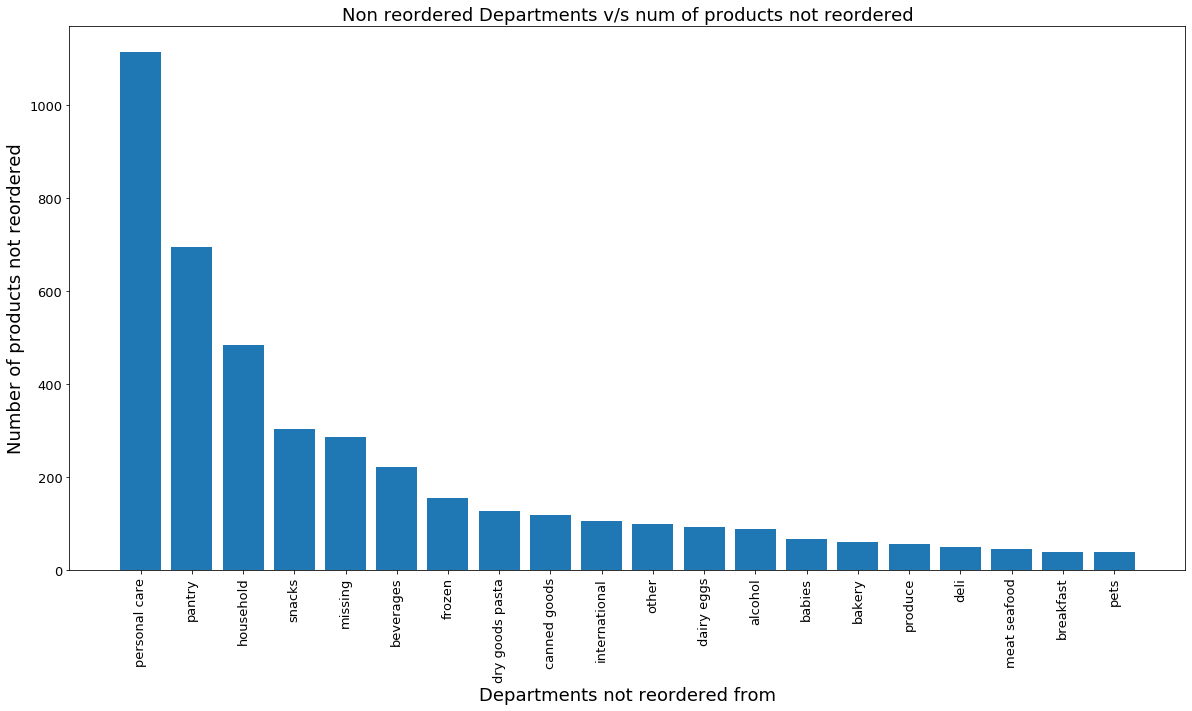

In [27]:
# Check the aisles and departments of these products
never_reordered_metadata = pd.merge(never_reordered, 
                                    pd.merge(pd.merge(products_df, aisles_df,
                                                      how='left', on='aisle_id'),
                                            departments_df,
                                            how='left',
                                            on='department_id'),
                                    how='left', 
                                    on='product_name')

uncommon_aisles = never_reordered_metadata['aisle'].value_counts().reset_index().rename(columns={'index': 'aisle',
                                                                                                 'aisle': 'frequency'})

# plt.figure(figsize=(20,10))
# plt.bar(uncommon_aisles['aisle'],
#         uncommon_aisles['frequency'],
#         tick_label=uncommon_aisles['aisle'])
# plt.xlabel('Aisles not reordered from', fontsize=18)
# plt.ylabel('Number of products not reordered', fontsize=18)
# plt.xticks(fontsize=13, rotation='vertical')
# plt.yticks(fontsize=13)
# plt.title('Non reordered aisles v/s num of products not reordered', fontsize=18)
# plt.show()


uncommon_dept = never_reordered_metadata['department'].value_counts().reset_index().rename(columns={'index': 'department',
                                                                                                 'department': 'frequency'})

plt.figure(figsize=(20,10))
plt.bar(uncommon_dept['department'],
        uncommon_dept['frequency'],
        tick_label=uncommon_dept['department'])
plt.xlabel('Departments not reordered from', fontsize=18)
plt.ylabel('Number of products not reordered', fontsize=18)
plt.xticks(fontsize=13, rotation='vertical')
plt.yticks(fontsize=13)
plt.title('Non reordered Departments v/s num of products not reordered', fontsize=18)
plt.show()

In [28]:
dairy_df = never_reordered_metadata[never_reordered_metadata['department'] == 'dairy eggs']
dairy_df['aisle'].value_counts()

dairy_df[dairy_df['aisle'] == 'eggs']
dairy_df[dairy_df['aisle'] == 'refrigerated pudding desserts']
# dairy_df[dairy_df['aisle'] == 'soy lactosefree']
# dairy_df[dairy_df['aisle'] == 'other creams cheeses']
# dairy_df[dairy_df['aisle'] == 'cream']
# dairy_df[dairy_df['aisle'] == 'butter']
# dairy_df[dairy_df['aisle'] == 'milk']
# dairy_df[dairy_df['aisle'] == 'specialty cheeses']
# dairy_df[dairy_df['aisle'] == 'yogurt']
# dairy_df[dairy_df['aisle'] == 'packaged cheese']

,product_name,reordered,product_id,aisle_id,department_id,aisle,department
2776,Organic Vanilla Almond Pudding,0,8541,71,16,refrigerated pudding desserts,dairy eggs
3077,Pudding Chocolate,0,38667,71,16,refrigerated pudding desserts,dairy eggs


In [29]:
# TODO: Average proportions of products from different departments in the orders
order_prior_metadata = pd.merge(order_prior_df, 
                                pd.merge(pd.merge(products_df, aisles_df,
                                                  how='left', on='aisle_id'),
                                         departments_df,
                                         how='left',
                                         on='department_id'),
                                how='left', 
                                on='product_id')
order_prior_metadata

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry
...,...,...,...,...,...,...,...,...,...
32434484,3421083,39678,6,1,Free & Clear Natural Dishwasher Detergent,74,17,dish detergents,household
32434485,3421083,11352,7,0,Organic Mini Sandwich Crackers Peanut Butter,78,19,crackers,snacks
32434486,3421083,4600,8,0,All Natural French Toast Sticks,52,1,frozen breakfast,frozen
32434487,3421083,24852,9,1,Banana,24,4,fresh fruits,produce
